<a href="https://colab.research.google.com/github/GUmarEla/Imgae-processing-algorithms/blob/main/CV_2_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Histogram Equalization**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### **Upload Image**

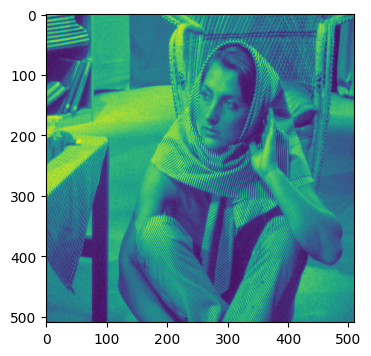

In [4]:
# read image as gray scale
image = cv2.imread("barbara.jpg",0)

plt.figure(figsize=(4,4))
plt.imshow(image)

In [ ]:
# def histogram_equalization(image):

In [5]:
# image
image_list = image.flatten().tolist()

In [6]:
list1 = np.arange(256)
list2 = list1 * 0

# count reetetion of every pixel in the photo
for i in range(len(image_list)):
  for j in range(len(list2)):
    if image_list[i] == list1[j]:
      list2[j] += 1
list2

array([   3,    1,    0,   12,   11,   26,   36,   57,   93,  135,  216,
        264,  376,  489,  617,  783,  884, 1027, 1188, 1258, 1273, 1391,
       1365, 1445, 1377, 1341, 1306, 1270, 1172, 1104, 1056, 1017,  931,
        958,  912,  927,  899,  900,  802,  956,  998,  959,  918,  954,
        943,  905,  874,  853,  906,  935,  883,  871,  895,  871,  933,
        911,  873,  903,  951,  939,  899,  959,  921,  933, 1068, 1003,
       1037, 1025, 1105, 1166, 1158, 1228, 1268, 1344, 1300, 1347, 1303,
       1397, 1339, 1362, 1498, 1446, 1477, 1456, 1528, 1502, 1519, 1524,
       1602, 1669, 1644, 1771, 1754, 1778, 1877, 1891, 1857, 1914, 1959,
       1993, 1986, 1930, 1897, 1875, 1878, 1800, 1862, 1833, 1853, 1814,
       1769, 1730, 1735, 1698, 1761, 1657, 1687, 1639, 1519, 1486, 1526,
       1463, 1542, 1440, 1451, 1309, 1332, 1335, 1291, 1275, 1277, 1227,
       1275, 1145, 1223, 1245, 1278, 1238, 1272, 1227, 1204, 1231, 1321,
       1294, 1410, 1374, 1402, 1512, 1556, 1644, 16

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({'pixels':list1,"repetetion":list2})
df.head()

,pixels,repetetion
0,0,3
1,1,1
2,2,0
3,3,12
4,4,11


In [11]:
# make second dataframe just as backup
df1 = df

In [14]:
# the PDF column
df1["PDF"] = df1['repetetion'] / (df1['repetetion'].sum())

In [16]:
df1.head()

,pixels,repetetion,PDF
0,0,3,0.000012
1,1,1,0.000004
2,2,0,0.000000
3,3,12,0.000046
4,4,11,0.000042


In [17]:
# CDF list
cdf_list = []

for i in range(len(df1)):
  if i == 0 :
    cdf_list.append(df1['PDF'][i])
  else:
    cdf_list.append(df1['PDF'][i]  + df1['PDF'][i-1])

In [28]:
cdf_list11 = np.zeros(256)

# for i in range(len(df1)):
#   if i == 0 :
#     cdf_list.append(df1['PDF'][i])
#   else:
#     cdf_list.append(df1['PDF'][i]  + cdf_list1[i-1])

for i in range(len(df1)):
  if i == 0 :
    cdf_list11[i] = df1['PDF'][i]
  else:
    cdf_list11[i] = df1['PDF'][i]  + cdf_list11[i-1]
cdf_list11;

In [30]:
cdf_list11[:5]

array([1.15340254e-05, 1.53787005e-05, 1.53787005e-05, 6.15148020e-05,
       1.03806228e-04])

In [31]:
df1['CDF'] = cdf_list11

In [32]:
df1.head()

,pixels,repetetion,PDF,CDF
0,0,3,0.000012,0.000012
1,1,1,0.000004,0.000015
2,2,0,0.000000,0.000015
3,3,12,0.000046,0.000062
4,4,11,0.000042,0.000104


In [37]:
df1['Sk'] = df1['CDF'] * 255

In [38]:
df1.head()

,pixels,repetetion,PDF,CDF,Sk
0,0,3,0.000012,0.000012,0.002941
1,1,1,0.000004,0.000015,0.003922
2,2,0,0.000000,0.000015,0.003922
3,3,12,0.000046,0.000062,0.015686
4,4,11,0.000042,0.000104,0.026471


**Pillow**
read image using pillow library

In [40]:
# add new column thet has "Histogram Equalization Level"
df1['Hist_equa'] = df1['Sk'].round()

In [44]:
# df1[:10]
df1.tail()

,pixels,repetetion,PDF,CDF,Sk,Hist_equa
251,251,7,0.000027,0.999904,254.975490,255.0
252,252,2,0.000008,0.999912,254.977451,255.0
253,253,10,0.000038,0.999950,254.987255,255.0
254,254,1,0.000004,0.999954,254.988235,255.0
255,255,12,0.000046,1.000000,255.000000,255.0


In [49]:
# Now that I have the new histogram equalization results of every pixel
# Let's the new
len(image_list)
image_list_backup = image_list

In [48]:
list_res1 = df1['pixels']
list_res2 = df1['Hist_equa']

In [50]:
image_list_new = np.zeros(len(image_list))
for i in range(len(image_list)):
  for j in range(256):
    if image_list[i] == list_res1[j]:
      image_list_new[i] = list_res2[j]

In [58]:
hei, wid = image.shape

In [69]:
reshaped_image = np.reshape(image_list_new, (hei, wid))

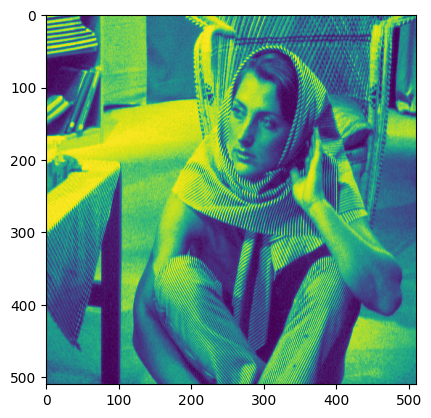

In [70]:
plt.imshow(reshaped_image)

### Compare with original image and the image historgam equalization form opencv library

In [72]:
print(reshaped_image.shape)
print(dst.shape)
reshaped_image - dst

(510, 510)
(510, 510)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])